# Predictive Analysis

* Nama : Andi Engku Putribuana
* Email : andiengku1922@gmail.com
* Id-Dicoding : putribuana


## Dataset Information

> Data Cite: Cortez, Paulo. "Student Performance." UCI Machine Learning Repository, 2008, https://doi.org/10.24432/C5TG7T.\

* Data  merupakan kumpulan informasi yang dikumpulkan dari dua sekolah di Portugis mengenai prestasi siswa tingkat menengah. Data ini mencakup berbagai aspek, mulai dari nilai akademik siswa (terutama dalam mata pelajaran Matematika dan Bahasa Portugis), latar belakang demografis siswa (seperti usia, jenis kelamin), faktor sosial (misalnya, kondisi keluarga), hingga karakteristik sekolah itu sendiri.




## Business Understanding
* Menganalisis Pengaruh latar belakang sosial ekonomi terhadap prestasi (Analisis Regresi)
* Tujuan penelitian: Untuk mengetahui sejauh mana faktor sosial ekonomi berkontribusi pada kesenjangan prestasi dan merancang program-program yang dapat mengurangi dampak negatif dari latar belakang sosial ekonomi yang kurang menguntungkan.

## Data Collection

### Import Library 

In [161]:
#Import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

In [162]:
pip install ucimlrepo

In [163]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
student_performance = fetch_ucirepo(id=320)

# data (as pandas dataframes)
X = student_performance.data.features
y = student_performance.data.targets

# metadata
print(student_performance.metadata)

# variable information
print(student_performance.variables)


{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'ID': 360, 'type': 'NATIVE', 'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'venue': 'Proceedings of 5th Annual Future Business Technolo

Karena kita akan menganalisis latar belakang sosial ekonomi terhadap prestasi, berikut adalah kolom penting yang akan dilakukan analisis :

* Medu: Tingkat pendidikan ibu
* Fedu: Tingkat pendidikan ayah
* Mjob: Pekerjaan ibu
* Fjob: Pekerjaan ayah
* address: Alamat tempat tinggal siswa (urban atau rural)
* famsize: Ukuran keluarga
* Pstatus: Status parental (bersama atau terpisah)
* paid: Apakah siswa mengikuti kelas tambahan berbayar
* internet: Apakah siswa memiliki akses internet di rumah

Kolom yang merepresentasikan hasil akademik:
* G1: Nilai periode pertama
* G2: Nilai periode kedua
* G3: Nilai akhir

In [164]:
import pandas as pd

column_names = ['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'paid', 'internet']

student = pd.DataFrame(data=X, columns=column_names)

student['G1'] = y['G1']
student['G2'] = y['G2']
student['G3'] = y['G3']

student.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,paid,internet,G1,G2,G3
0,F,18,U,GT3,A,4,4,at_home,teacher,no,no,0,11,11
1,F,17,U,GT3,T,1,1,at_home,other,no,yes,9,11,11
2,F,15,U,LE3,T,1,1,at_home,other,no,yes,12,13,12
3,F,15,U,GT3,T,4,2,health,services,no,yes,14,14,14
4,F,16,U,GT3,T,3,3,other,other,no,no,11,13,13


## Data Understanding & Removing Outlier

In [165]:
student.shape

(649, 14)

In [166]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sex       649 non-null    object
 1   age       649 non-null    int64 
 2   address   649 non-null    object
 3   famsize   649 non-null    object
 4   Pstatus   649 non-null    object
 5   Medu      649 non-null    int64 
 6   Fedu      649 non-null    int64 
 7   Mjob      649 non-null    object
 8   Fjob      649 non-null    object
 9   paid      649 non-null    object
 10  internet  649 non-null    object
 11  G1        649 non-null    int64 
 12  G2        649 non-null    int64 
 13  G3        649 non-null    int64 
dtypes: int64(6), object(8)
memory usage: 71.1+ KB


In [167]:
student.describe()

,age,Medu,Fedu,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,19.000000,19.000000,19.000000


## Handling Missing Value

In [168]:
student.isnull().sum()

,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0
paid,0


Setelah mengecek missing value, dapat dilihat bahwa pada dataset tidak terdapat missing value

## Handling Outliers

<Axes: xlabel='age'>

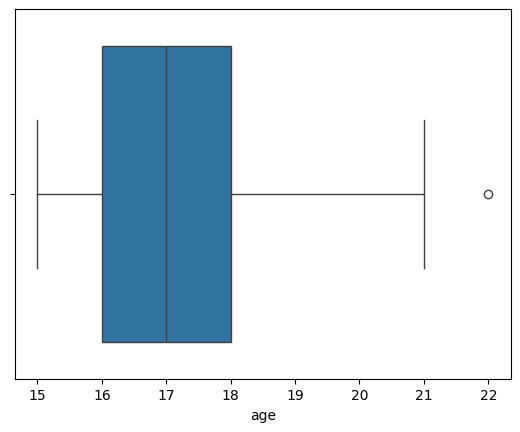

In [169]:
sns.boxplot(x=student['age'])

boxplot pada kolom "age" menunjukkan adanya satu titik disebelah kanan, yang menandakan ada outlier. yang artinya ada satu sampel yang memiliki nilai lebih besar dari batas atas whisker.

<Axes: xlabel='Medu'>

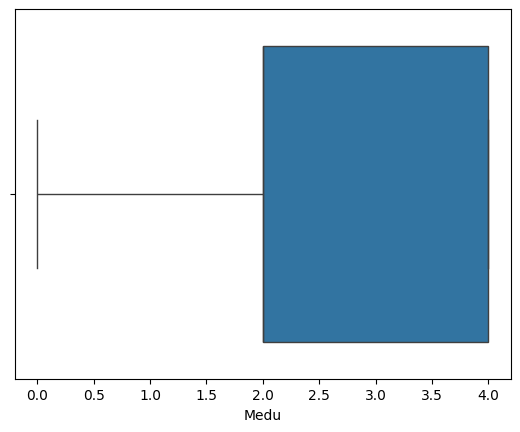

In [170]:
sns.boxplot(x=student['Medu'])

boxplot pada kolom "Medu" tidak menujukkan adanya outlier

Mari kita asumsikan kolom "Medu" dan "Fedu" yg memeiliki skala 1-4 ini dengan keterangan berikut:
1. Pendidikan dasar
2. Pendidikan menengah pertama
3. Pendidikan menengah atas
4. Pendidikan tinggi

<Axes: xlabel='Fedu'>

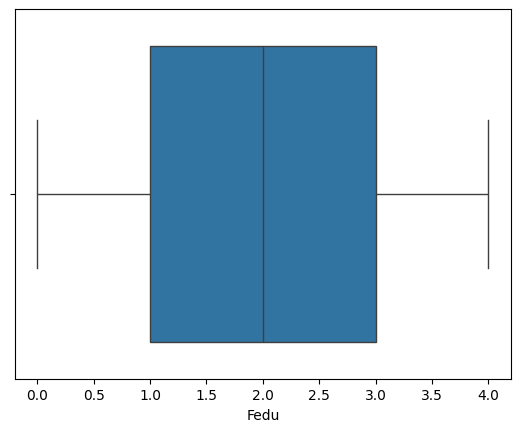

In [171]:
sns.boxplot(x=student['Fedu'])

boxplot pada kolom "Fedu" juga tidak menujukkan adanya otlier.

<Axes: xlabel='G1'>

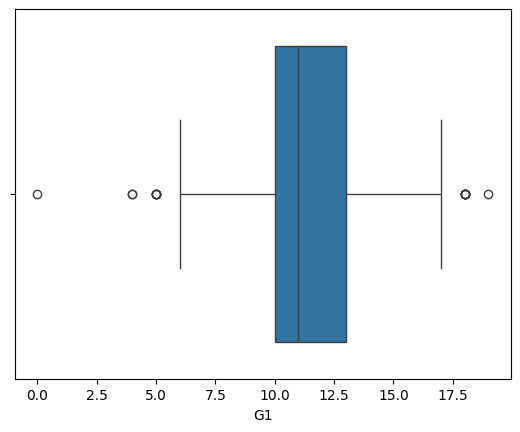

In [172]:
sns.boxplot(x=student['G1'])

boxplot pada kolom "G1" outliers ada di beberapa titik di sebelah kiri dan kanan whisker, yang menandakan bahwa ada outliers pada distribusi nilai G1.

Dapat dipertimbangkan untuk melakukan capping/mengganti outlier dengan nilai median

<Axes: xlabel='G2'>

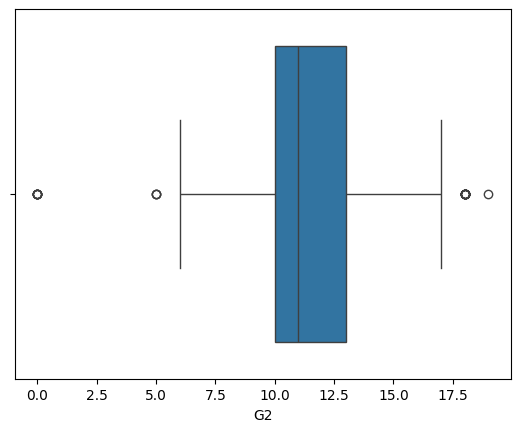

In [173]:
sns.boxplot(x=student['G2'])

boxplot pada kolom "G2" juga terdapat outliers yang ada di beberapa titik di sebelah kiri dan kanan whisker, yang menandakan bahwa ada outliers pada distribusi nilai G2.

kolom G2 juga dapat dipertimbangkan untuk melakukan capping/mengganti outlier dengan nilai median

<Axes: xlabel='G3'>

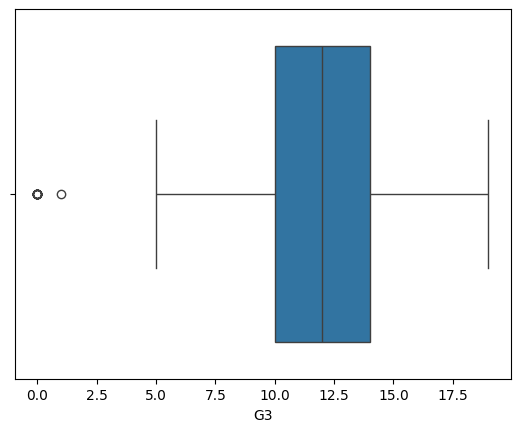

In [174]:
sns.boxplot(x=student['G3'])

boxplot pada kolom "G3" juga terdapat outliers yang ada di beberapa titik di sebelah kiri whisker, yang menandakan bahwa ada outliers pada distribusi nilai G3.

kolom G3 juga dapat dipertimbangkan untuk melakukan capping/mengganti outlier dengan nilai median

Dari hasil pengamatan kolom yang terdapat otliers tadi adalah sebagai berikut:

* Kolom Usia (age): Kita mungkin tidak ingin menghapus usia siswa
* Nilai (G1, G2, G3): Bisa dilakukan capping atau mengganti outliers dengan median

In [175]:
# Fungsi untuk mengganti outliers dengan median
def replace_outliers_with_median(student, column):
    Q1 = student[column].quantile(0.25)
    Q3 = student[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = student[column].median()
    # Ganti nilai outliers dengan median
    student[column] = np.where((student[column] < lower_bound) | (student[column] > upper_bound), median_value, student[column])
    return student

# Terapkan pada kolom 'G1', 'G2', dan 'G3'
student_fixed = student.copy()
for col in ['G1', 'G2', 'G3']:
    student_fixed = replace_outliers_with_median(student_fixed, col)

# Tampilkan hasil
student_fixed[['G1', 'G2', 'G3']].describe()

,G1,G2,G3
count,649.000000,649.000000,649.000000
mean,11.395994,11.553159,12.200308
std,2.509005,2.424291,2.624069
min,6.000000,6.000000,5.000000
25%,10.000000,10.000000,10.000000
50%,11.000000,11.000000,12.000000
75%,13.000000,13.000000,14.000000
max,17.000000,17.000000,19.000000


Setelah menangani outliers pada kolom "G1, G2, dan G3" dengan mengisi nilai NaN menjadi median, berikut penjelasannya:

* Ketiga kolom memiliki 649 observasi, yang berarti tidak ada data yang hilang setelah pengisian nilai median.

* Rata-rata (Mean):

G1: 11.40
G2: 11.55
G3: 12.20
Rata-rata nilai akhir siswa (G3) sedikit lebih tinggi dibandingkan dengan nilai pada periode pertama (G1) dan periode kedua (G2). Ini menunjukkan bahwa secara umum, siswa mungkin mengalami peningkatan performa dari periode pertama ke periode akhir.

* Median (50%):

G1 dan G2 memiliki median 11.00, sementara G3 memiliki median 12.00.
Artinya, setengah dari siswa mendapatkan nilai di bawah 11 untuk G1 dan G2, tetapi untuk G3, setengah dari siswa mendapat nilai di bawah 12. Ini menunjukkan peningkatan performa di nilai akhir.

* Kuartil (25%, 75%):

Kuartil pertama (Q1) dan ketiga (Q3) untuk G1 dan G2 adalah 10 dan 13, sedangkan untuk G3 adalah 10 dan 14.
Selisih antara kuartil pertama dan ketiga menunjukkan rentang interquartile (IQR):
IQR untuk G1 dan G2: 
* IQR untuk G1 dan G2: 13 − 10 = 3 13−10=3 
* IQR untuk G3: 14 − 10 = 4 14−10=4
Rentang interquartile yang lebih tinggi di G3 menunjukkan lebih banyak variasi di nilai akhir siswa dibandingkan dengan periode sebelumnya. 

## Univariate Analysis

In [176]:
numerical_features = ['age', 'Medu', 'Fedu', 'G1', 'G2', 'G3']
categorical_features = ['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'paid', 'internet']

### Categorical Features

     jumlah sampel  persentase
sex                           
F              383        59.0
M              266        41.0


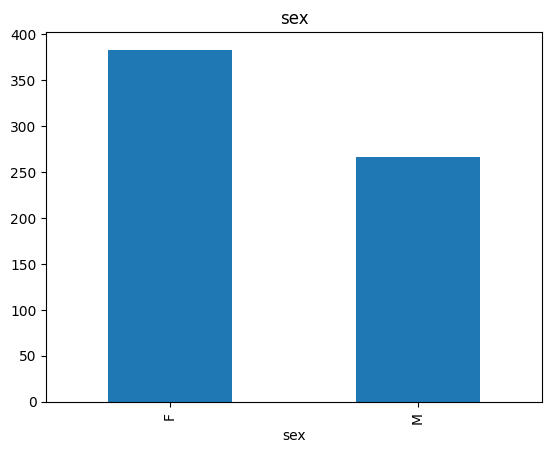

In [177]:
feature = categorical_features[0]
count = student[feature].value_counts()
percent = 100*student[feature].value_counts(normalize=True)
student0 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(student0)
count.plot(kind='bar', title=feature);

pada grafik diatas kolom "sex" atau jenis kelamin, menujukkan bahwa siswa berjenis kelamin perempuan lebih banyak dibanding laki-laki dengan total sample 383 banding 266.

         jumlah sampel  persentase
address                           
U                  452        69.6
R                  197        30.4


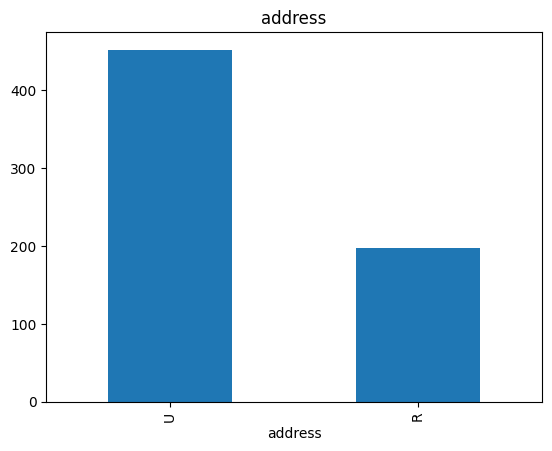

In [178]:
feature = categorical_features[1]
count = student[feature].value_counts()
percent = 100*student[feature].value_counts(normalize=True)
student1 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(student1)
count.plot(kind='bar', title=feature);

pada grafik diatas kolom "addres", menujukkan bahwa siswa yang bertempat tinggal di urban (kota) lebih banyak dibanding yang tinggal di rural (desa) dengan total sample 452 banding 157

         jumlah sampel  persentase
famsize                           
GT3                457        70.4
LE3                192        29.6


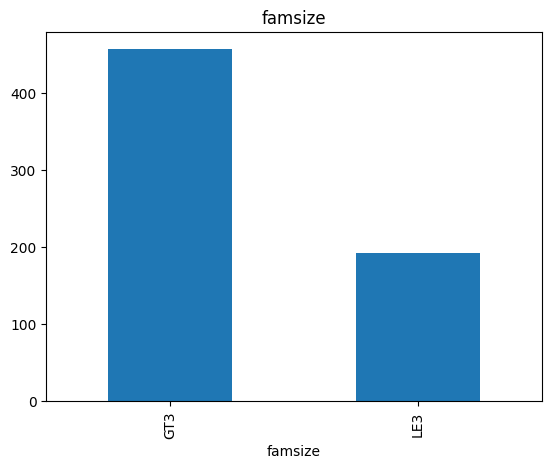

In [179]:
feature = categorical_features[2]
count = student[feature].value_counts()
percent = 100*student[feature].value_counts(normalize=True)
student2 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(student2)
count.plot(kind='bar', title=feature);

selanjutnya pada grafik diatas kolom "famsize" menujukkan bahwa famsize dengan kode GT3(jumlah keluarga >3) lebih banyak dibanding LE3(jumlah keluarga <3>) dengan total sample 457 banding 192.

         jumlah sampel  persentase
Pstatus                           
T                  569        87.7
A                   80        12.3


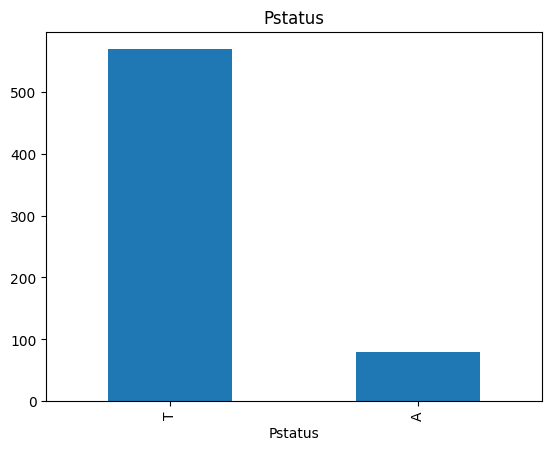

In [180]:
feature = categorical_features[3]
count = student[feature].value_counts()
percent = 100*student[feature].value_counts(normalize=True)
student3 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(student3)
count.plot(kind='bar', title=feature);

pada grafik diatas kolom "Pstatus" atau Status orangtua menujukkan bahwa siswa dengan status orang tua T(bersama) lebih banyak dibanding siswa dengan status keluarga A(berpisah) 

          jumlah sampel  persentase
Mjob                               
other               258        39.8
services            136        21.0
at_home             135        20.8
teacher              72        11.1
health               48         7.4


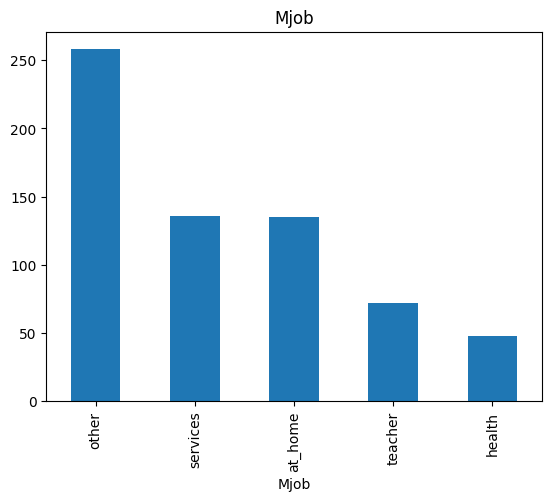

In [181]:
feature = categorical_features[4]
count = student[feature].value_counts()
percent = 100*student[feature].value_counts(normalize=True)
student4 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(student4)
count.plot(kind='bar', title=feature);

pada grafik diatas kolom "Mjob" atau pekerjaaan ibu, dapat dilihat bahwa dari kelima kategori pekerjaan, banyak dari siswa tidak mencantumkan pekerjaan orang tua mereka dengan memilih kategori "other" atau "lainnya" dengan total sample sebanyak 258, disusul oleh kategori pekerjaan ibu sebagai "services" yang selisih satu dengan pekerjaan ibu kategori "at_home" dengan total sample 136 dan 135. Untuk kategori pekerjaan ibu sebagai "teacher" dan "health" menempati tempat terendah yang artinya, siswa dengan pekerjaan ibu sebagai guru dan tenaga kesehatan sangat sedikit dibanding yang lainnya.

          jumlah sampel  persentase
Fjob                               
other               367        56.5
services            181        27.9
at_home              42         6.5
teacher              36         5.5
health               23         3.5


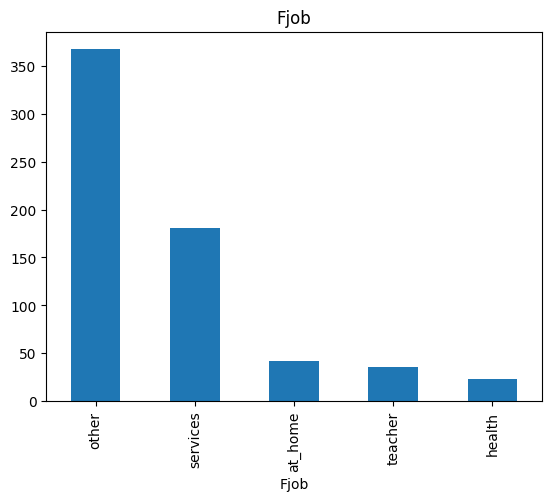

In [182]:
feature = categorical_features[5]
count = student[feature].value_counts()
percent = 100*student[feature].value_counts(normalize=True)
student5 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(student5)
count.plot(kind='bar', title=feature);

pada grafik diatas kolom "Fjob" atau pekerjaaan ayah, dapat dilihat bahwa dari kelima kategori pekerjaan, banyak dari siswa tidak mencantumkan pekerjaan orang tua mereka dengan memilih kategori "other" atau "lainnya" dengan total sample sebanyak 367, disusul oleh kategori pekerjaan ayah sebagai "services" dengan total sample sebanyak 181, kemudian untuk kategori pekerjaan ayah bagian "at_home", "teacher" dan "health" menduduki peringkat terbawah dengan total sample masing2 hanya 42, 36 dan 32.

      jumlah sampel  persentase
paid                           
no              610        94.0
yes              39         6.0


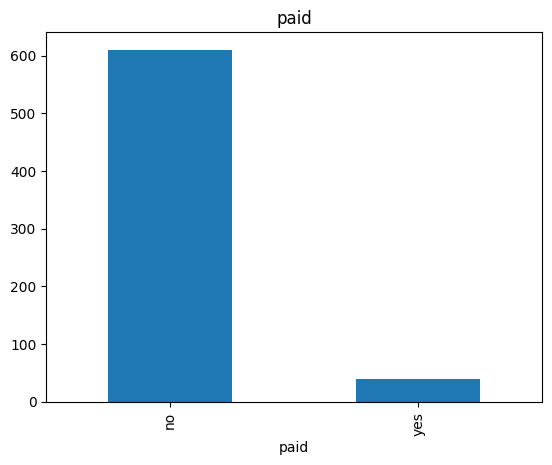

In [183]:
feature = categorical_features[6]
count = student[feature].value_counts()
percent = 100*student[feature].value_counts(normalize=True)
student6 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(student6)

count.plot(kind='bar', title=feature);

pada grafik diatas kolom "paid" atau mengikuti kelas tambahan, dapat dilihat bahwa total siswa yang memilih "no" lebih banyak dibanding yang memilih "yes" yang artinya, siswa yang tidak mengikuti kelas tambahan lebih banyak dibanding dengan yang mengikuti.

          jumlah sampel  persentase
internet                           
yes                 498        76.7
no                  151        23.3


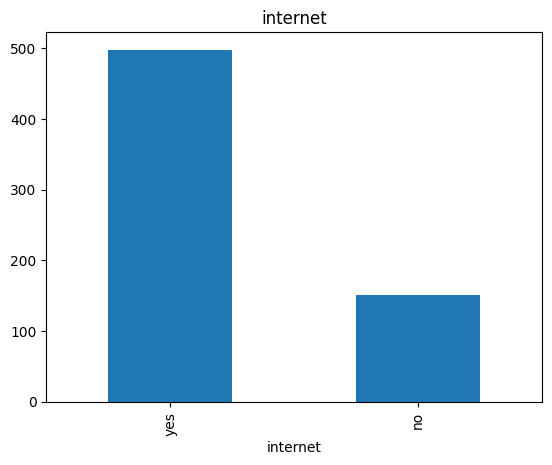

In [184]:
feature = categorical_features[7]
count = student[feature].value_counts()
percent = 100*student[feature].value_counts(normalize=True)
student7 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(student7)

count.plot(kind='bar', title=feature);

pada grafik diatas kolom "internet" atau yang memiliki akses internet dirumah, dapat dilihat bahwa total siswa yang memilih "yes" lebih abnyak dibanding yang memilih "no" yang artinya, siswa yang memiliki akses internet dirumah lebih banyak dibanding yang tidak.

### Numerical Features

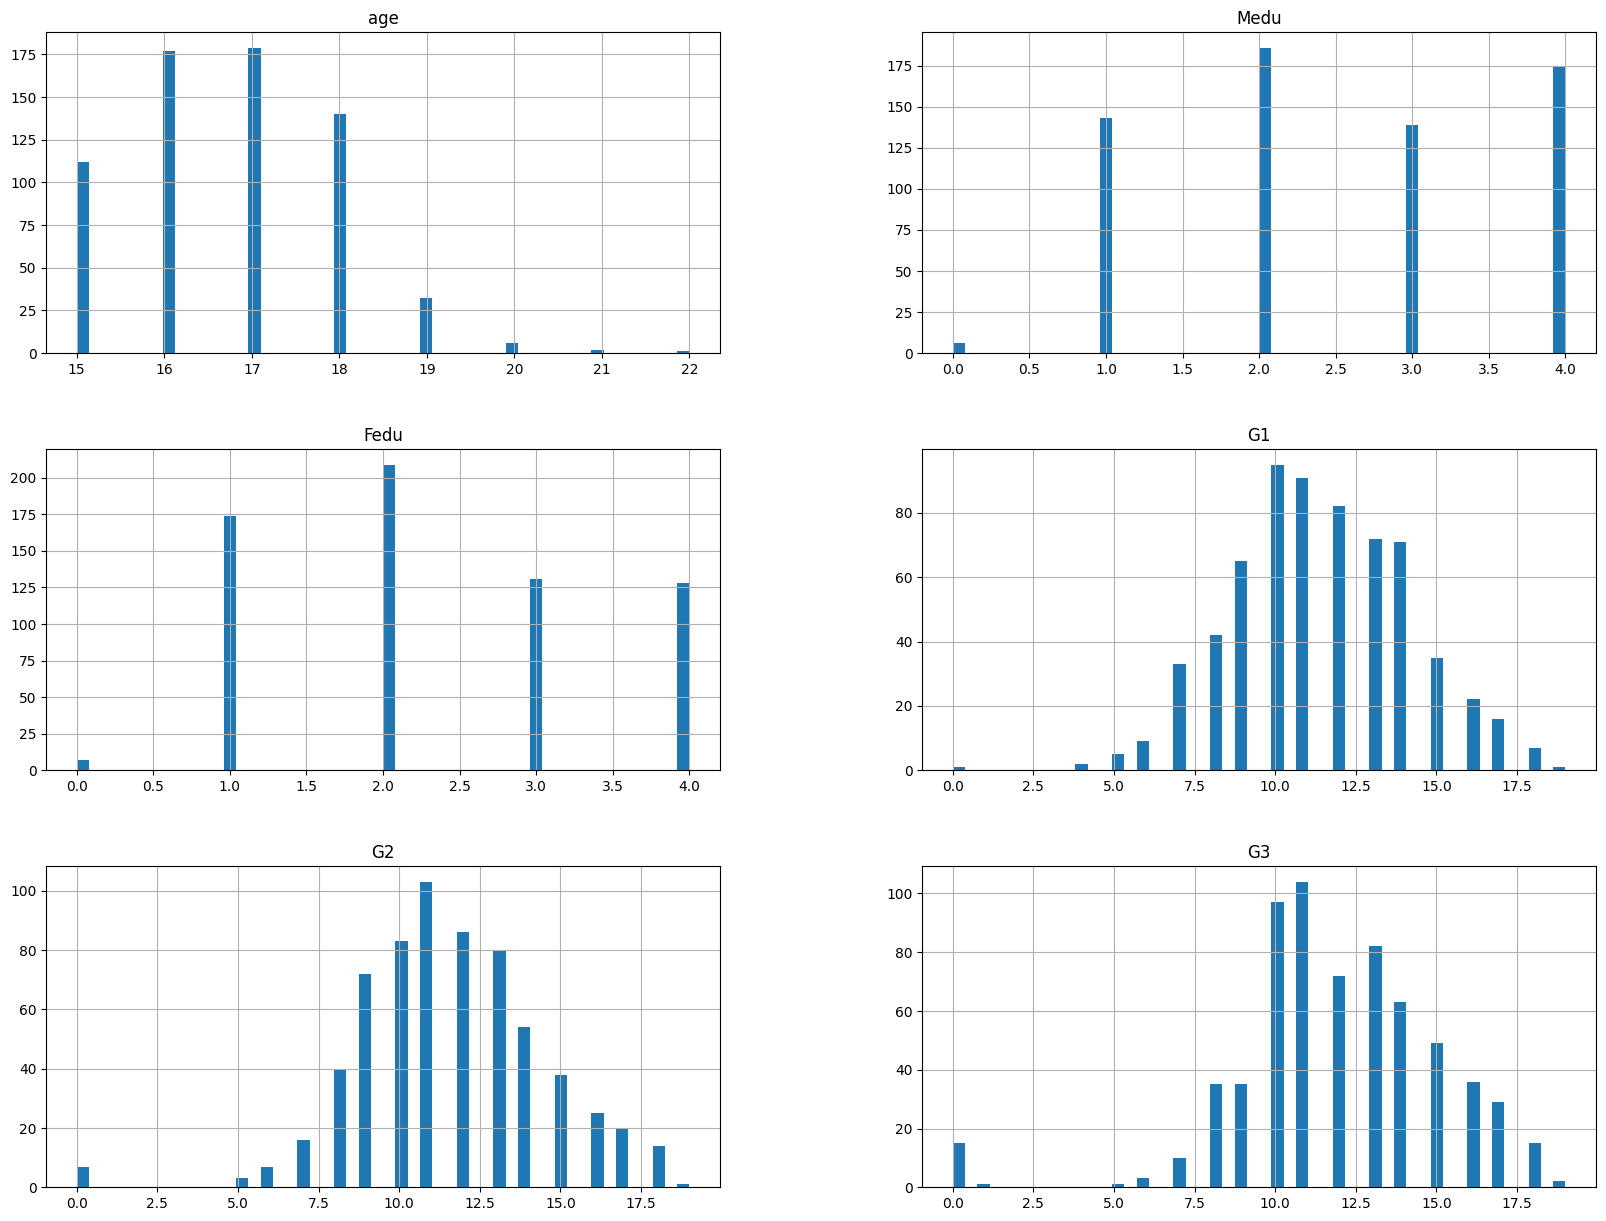

In [185]:
student.hist(bins=50, figsize=(20,15))
plt.show()

Selanjutnya, tahap univariate analysis fitur numerical, dapat dilihat bahwa:

* pada kolom "age" siswa dengan usia 17 tahun menduduki posisi teratas, dan disusul oleh siswa yang berusia 16 tahun, dan 18 tahun. kemudian di posisi ke-empat ditempati oleh siswa yang berusia 15 tahun. Kemudian dapat dilihat siswa yang berusia 20,21, dan 22 tahun menempati posisi terbawah. ini artinya, siswa sekolah didominasi oleh remaja usia 16-18 tahun.

* pada kolom "Medu" atau pendidikan ibu, pendidikan ibu skala menengah denagn kategori "2" menduduki posisi pertama, disusul dengan pendidikan skala tinggi kategori "4". Untuk pendidikan ibu dengan skala "1" dan "3" hampir sama hanya dengan sedikit selisih saja. dan pendidikan ibu dengan kategori "0" menempati posisi terendah.

* pada kolom "Fedu" atau pendidikan ayah, data cenderung terpusat pada beberapa nilai tertentu, dengan frekuensi yang cukup tinggi pada nilai 1, 2, 3, dan 4. Terdapat sedikit sekali data pada nilai 0 dan 0.5.

* pada kolom "G1" atau nilai semester satu siswa, dapat dilihat bahwa data cenderung terpusat pada rentang nilai 10 hingga 13, dengan frekuensi yang cukup tinggi. Terdapat sedikit sekali data pada nilai 0, 2.5, 5, dan 17.5. Ini menunjukkan bahwa sebagian besar siswa dalam sampel memiliki nilai semester satu yang cukup baik, berkisar antara 10 hingga 13 dan proporsi siswa yang memiliki nilai sangat rendah (mendekati 0) atau sangat tinggi (mendekati 18) sangat kecil dalam sampel ini.

* pada kolom "G2" atau nilai semester dua siswa, dapat dilihat bahwa Sebagian besar data terpusat pada rentang nilai 10 hingga 13, dengan frekuensi yang cukup tinggi. Terdapat sedikit sekali data pada nilai 0, 2.5, 5, dan 17.5.Adanya sedikit sekali data pada nilai 0, 2.5, 5, dan 17.5 menunjukkan bahwa hanya sedikit siswa yang mendapatkan nilai sangat rendah atau sangat tinggi.


* pada kolom "G3" atau nilai semester tiga siswa, dapat dilihat bahwa ebagian besar siswa memperoleh nilai di sekitar rentang 10-13. Ini mengindikasikan bahwa secara umum, prestasi siswa pada semester tiga cukup baik.


## Multivariate Analysis

### Categorical Features

Mari kita asumsikan untuk analisis Hubungan Antar Variabel Kategorikal dengan prestasi dan kolom "G3" sebagai target utama.

<ipython-input-199-d9139f3cdab7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=student, x=feature, y='G3', palette="Blues")
<ipython-input-199-d9139f3cdab7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=student, x=feature, y='G3', palette="Blues")
<ipython-input-199-d9139f3cdab7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=student, x=feature, y='G3', palette="Blues")
<ipython-input-199-d9139f3cdab7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the

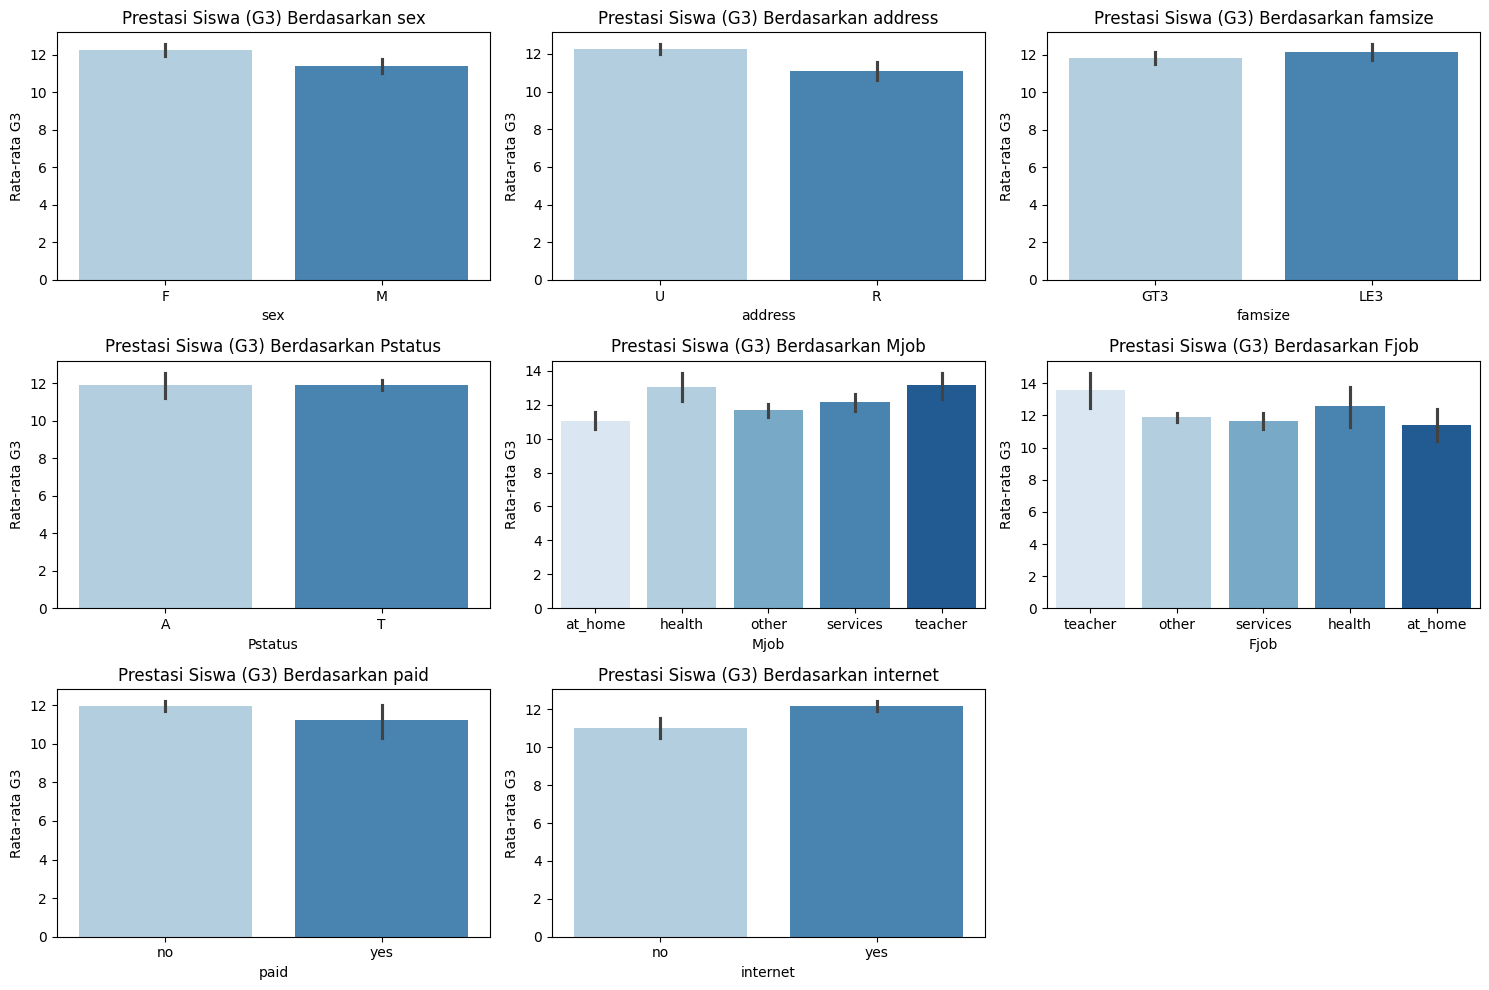

In [199]:
plt.figure(figsize=(15, 10))

# Loop untuk setiap fitur kategorikal
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)

    # Visualisasi menggunakan bar plot
    sns.barplot(data=student, x=feature, y='G3', palette="Blues")

    # Menambahkan judul dan label
    plt.title(f'Prestasi Siswa (G3) Berdasarkan {feature}')
    plt.xticks(rotation=0)
    plt.ylabel('Rata-rata G3')

plt.tight_layout()
plt.show()

Dari hasil visualisasi multivariate diatas dengaan target "G3" untuk menganalisis hubungan antar variabel, berikut penjelasannya:

- kolom sex: Tidak ada perbedaan signifikan antara rata-rata nilai G3 siswa laki-laki dan perempuan.

- kolom addres: Siswa yang tinggal di daerah urban (U) cenderung memiliki rata-rata nilai G3 yang sedikit lebih tinggi dibandingkan dengan siswa yang tinggal di daerah rural (R).

- kolom famsize: Tidak ada perbedaan signifikan antara rata-rata nilai G3 siswa yang berasal dari keluarga besar (GT3) dan keluarga kecil (LE3).

- kolom Pstatus: Siswa yang orang tuanya masih bersama(T) cenderung memiliki rata-rata nilai G3 yang lebih tinggi dibandingkan dengan siswa yang orang tuanya sudah berpisah(A).

- kolom Mjob: Terdapat sedikit perbedaan dalam rata-rata nilai G3 berdasarkan pekerjaan ibu, namun tidak ada pola yang jelas dan signifikan.

- kolom Fjob: Terdapat sedikit perbedaan dalam rata-rata nilai G3 berdasarkan pekerjaan ayah, namun tidak ada pola yang jelas dan signifikan.

- kolom paid: Siswa yang tidak mengikuti kelas tambahan atau "no" cenderung meiliki nilai G3 yang tinggi dibandingkan dengan yang memilih "yes".

-kolom internet: Siswa yang memiliki akses internet di rumah (yes) cenderung memiliki rata-rata nilai G3 yang sedikit lebih tinggi dibandingkan dengan siswa yang tidak memiliki akses internet di rumah (no).


### Numerical Features

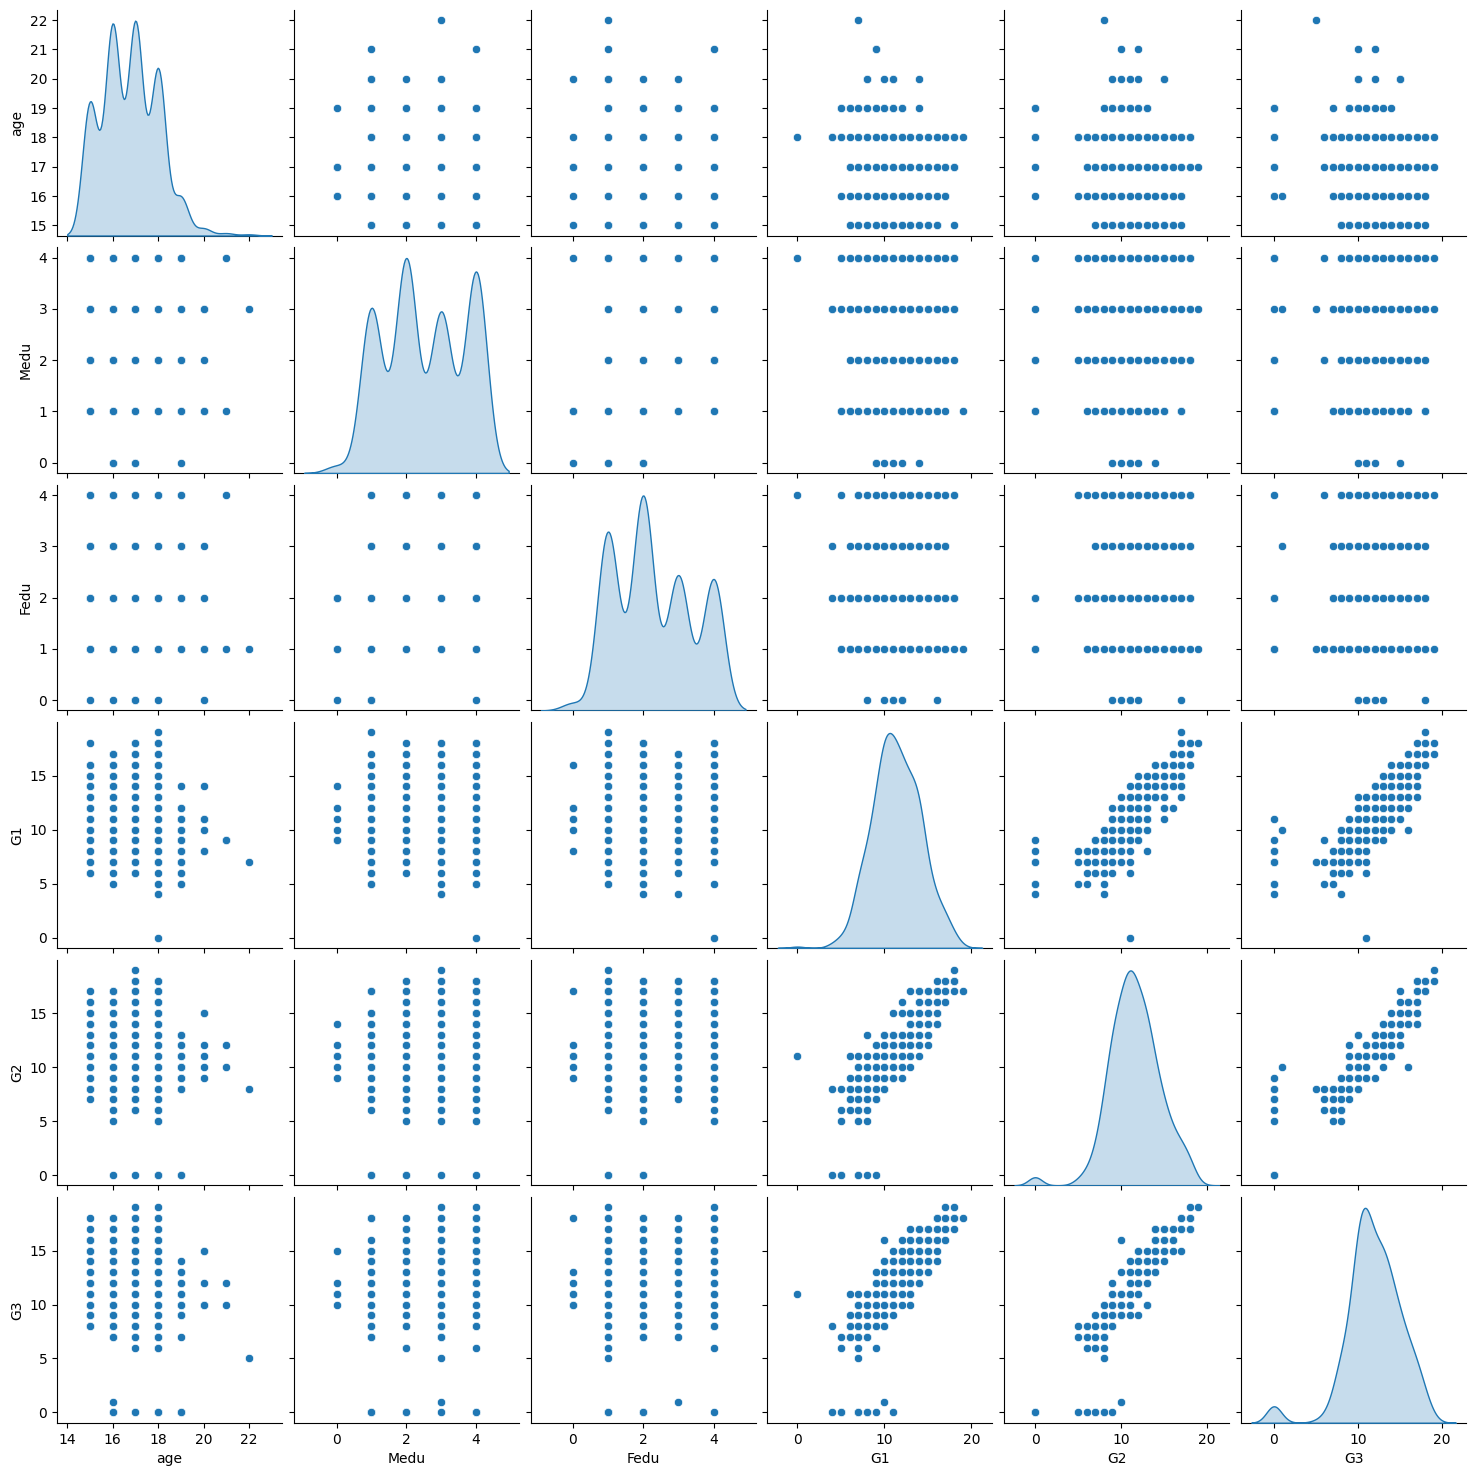

In [193]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(student, diag_kind = 'kde')

Pada visualisasi pairplot diatas untuk mengamati fitur numerik, dapat dilihat bahwa:

- Hubungan antara nilai semester: Terlihat adanya korelasi positif yang kuat antara G1, G2, dan G3. Ini menunjukkan bahwa siswa yang memiliki nilai bagus pada semester awal cenderung memiliki nilai bagus juga pada semester-semester berikutnya.
- Hubungan antara pendidikan orang tua dan nilai: Mungkin ada korelasi positif antara pendidikan orang tua (Medu dan Fedu) dengan nilai siswa (G1, G2, G3). Ini menunjukkan bahwa pendidikan orang tua dapat menjadi faktor yang mempengaruhi prestasi akademik anak.
- Hubungan antara usia dan nilai: Korelasi antara usia dan nilai mungkin tidak terlalu kuat atau bahkan tidak ada. Ini menunjukkan bahwa usia tidak selalu menjadi faktor penentu dalam prestasi akademik.

Text(0.5, 1.0, 'Korelasi Matrix untuk Fitur Numerik ')

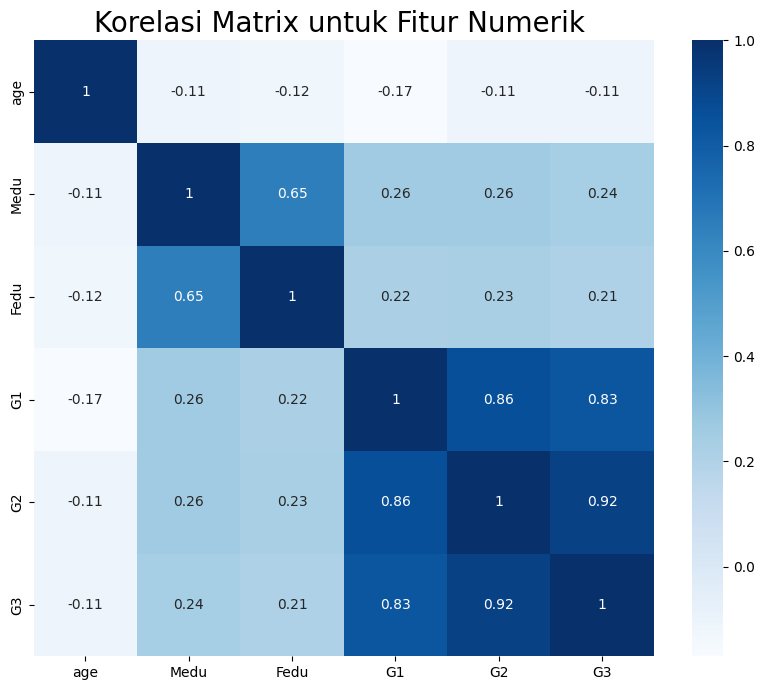

In [198]:
plt.figure(figsize=(10, 8))
correlation_matrix = student[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap=sns.color_palette("Blues", as_cmap=True) )
plt.title("Korelasi Matrix untuk Fitur Numerik ", size=20)

 Berdasarkan hasil korelasi matrix diatas,

* Nilai Ujian (G1, G2, G3) memiliki korelasi yang sangat kuat satu sama lain, menunjukkan bahwa performa siswa pada semester sebelumnya dapat menjadi indikator performa di semester berikutnya.
* Pendidikan Orang Tua (Medu dan Fedu) juga memiliki korelasi yang cukup kuat, yang bisa menunjukkan bahwa orang tua dengan tingkat pendidikan tinggi cenderung menikah dengan pasangan dengan tingkat pendidikan yang sama.
* Usia tidak terlalu berkorelasi dengan variabel lain, yang berarti faktor usia tidak terlalu berpengaruh terhadap nilai siswa atau pendidikan orang tua.

## Data Preparation

## Melakukan Encoding dengan One Hot Encoder
One-Hot Encoding adalah teknik yang digunakan dalam machine learning untuk mengubah data kategorikal menjadi data numerik yang dapat dipahami oleh algoritma.

In [203]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded_data = encoder.fit_transform(student[categorical_features])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))

student_encoded = pd.concat([student, encoded_df], axis=1)

student_encoded.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,paid,...,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,paid_no,paid_yes,internet_no,internet_yes
0,F,18,U,GT3,A,4,4,at_home,teacher,no,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,F,17,U,GT3,T,1,1,at_home,other,no,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,F,15,U,LE3,T,1,1,at_home,other,no,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,F,15,U,GT3,T,4,2,health,services,no,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,F,16,U,GT3,T,3,3,other,other,no,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


Dari output diatas, variabel-variabel kategorikal seperti sex, address, famsize, Pstatus, Mjob, Fjob, paid, dan internet telah diubah menjadi variabel biner yaitu (0 dan 1).

## Split Dataset

In [223]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

student_encoded_cleaned = student_encoded.copy()

string_columns = student_encoded_cleaned.select_dtypes(include=['object']).columns

if not string_columns.empty:
    print(f"Kolom yang masih berupa string dan akan diubah: {list(string_columns)}")

    student_encoded_cleaned[string_columns] = student_encoded_cleaned[string_columns].apply(lambda col: col.astype('category').cat.codes)

Kolom yang masih berupa string dan akan diubah: ['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'paid', 'internet']


In [224]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 649
Total # of sample in train dataset: 519
Total # of sample in test dataset: 130


## Model Development

### Algoritma Linear Regression

In [225]:
# Training Model: Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)

# Evaluasi Linear Regression
mae_lin = mean_absolute_error(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print(f"Linear Regression - MAE: {mae_lin:.2f}, MSE: {mse_lin:.2f}, R²: {r2_lin:.2f}")

Training Model: Linear Regression
Linear Regression - MAE: 0.80, MSE: 1.47, R²: 0.86


### Algoritma Desicion Tree Regressor

In [226]:
# Training Model: Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=123)
tree_reg.fit(X_train_scaled, y_train)
y_pred_tree = tree_reg.predict(X_test_scaled)

# Evaluasi Decision Tree
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree - MAE: {mae_tree:.2f}, MSE: {mse_tree:.2f}, R²: {r2_tree:.2f}")

Decision Tree - MAE: 0.92, MSE: 2.52, R²: 0.77


### Algoritma Random Forrest Regressor

In [227]:
# Training Model: Random Forest Regressor
forest_reg = RandomForestRegressor(random_state=123)
forest_reg.fit(X_train_scaled, y_train)
y_pred_forest = forest_reg.predict(X_test_scaled)

# Evaluasi Random Forest
mae_forest = mean_absolute_error(y_test, y_pred_forest)
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print(f"Random Forest - MAE: {mae_forest:.2f}, MSE: {mse_forest:.2f}, R²: {r2_forest:.2f}")

Random Forest - MAE: 0.88, MSE: 1.79, R²: 0.83


### Algoritma Super Vector Regressor

In [228]:
# Training Model: Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluasi SVR
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR - MAE: {mae_svr:.2f}, MSE: {mse_svr:.2f}, R²: {r2_svr:.2f}")

SVR - MAE: 1.12, MSE: 3.08, R²: 0.72


## Model Evaluation

### Evaluasi Model Linear Regression

In [239]:
def evaluate_model(model_name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name} - Evaluation Metrics:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"R²: {r2:.2f}")
    return mae, mse, r2

# Evaluasi Model Linear Regression
mae_lin, mse_lin, r2_lin = evaluate_model("Linear Regression", y_test, y_pred_lin)


Linear Regression - Evaluation Metrics:
MAE: 0.80
MSE: 1.47
R²: 0.86


### Evaluasi Model Desicion Tree

In [240]:
# Evaluasi Model Decision Tree
mae_tree, mse_tree, r2_tree = evaluate_model("Decision Tree Regressor", y_test, y_pred_tree)


Decision Tree Regressor - Evaluation Metrics:
MAE: 0.92
MSE: 2.52
R²: 0.77


### Evaluasi Model Random Forest

In [241]:
# Evaluasi Model Random Forest
mae_forest, mse_forest, r2_forest = evaluate_model("Random Forest Regressor", y_test, y_pred_forest)


Random Forest Regressor - Evaluation Metrics:
MAE: 0.88
MSE: 1.79
R²: 0.83


### Evaluasi Model SVR

In [242]:
# Evaluasi Model SVR
mae_svr, mse_svr, r2_svr = evaluate_model("Support Vector Regressor", y_test, y_pred_svr)


Support Vector Regressor - Evaluation Metrics:
MAE: 1.12
MSE: 3.08
R²: 0.72


### Perbandingan 4 Algoritma 

In [243]:
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR'],
    'MAE': [mae_lin, mae_tree, mae_forest, mae_svr],
    'MSE': [mse_lin, mse_tree, mse_forest, mse_svr],
    'R²': [r2_lin, r2_tree, r2_forest, r2_svr]
})

print("\nHasil Evaluasi Model:\n")
print(results_df)



Hasil Evaluasi Model:

               Model       MAE       MSE        R²
0  Linear Regression  0.795867  1.472508  0.864234
1      Decision Tree  0.923077  2.523077  0.767371
2      Random Forest  0.877035  1.794116  0.834581
3                SVR  1.121644  3.075471  0.716440


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Decision Tree'),
  Text(2, 0, 'Random Forest'),
  Text(3, 0, 'SVR')])

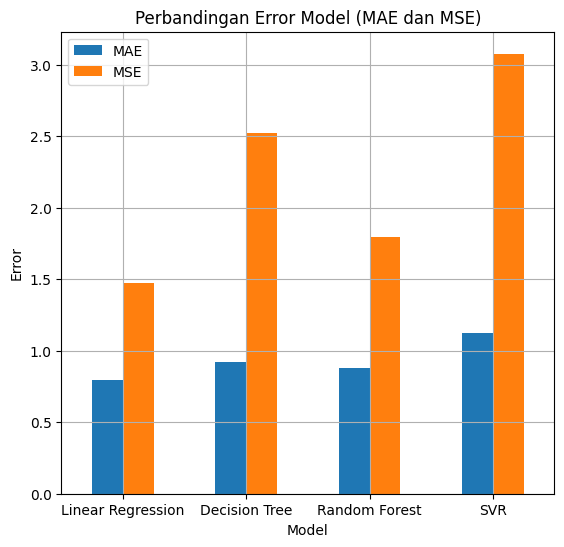

In [251]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
results_df.set_index('Model')[['MAE', 'MSE']].plot(kind='bar',ax=plt.gca())
plt.title('Perbandingan Error Model (MAE dan MSE)')
plt.ylabel('Error')
plt.grid(True)
plt.xticks(rotation=0)

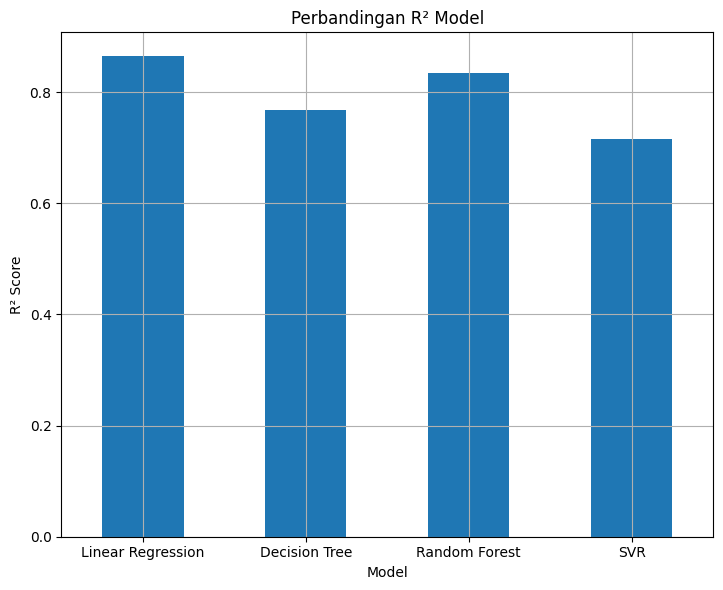

In [252]:
# Bar plot untuk R²
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
results_df.set_index('Model')['R²'].plot(kind='bar', ax=plt.gca())
plt.title('Perbandingan R² Model')
plt.ylabel('R² Score')
plt.grid(True)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()